In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv("train_titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dropna(inplace =True)

In [41]:
X = df[["Pclass", "Fare", "Age"]]

X.head()

,Pclass,Fare,Age
PassengerId,,,
2,1,71.2833,38.0
4,1,53.1000,35.0
7,1,51.8625,54.0
11,3,16.7000,4.0
12,1,26.5500,58.0


<Axes: ylabel='Frequency'>

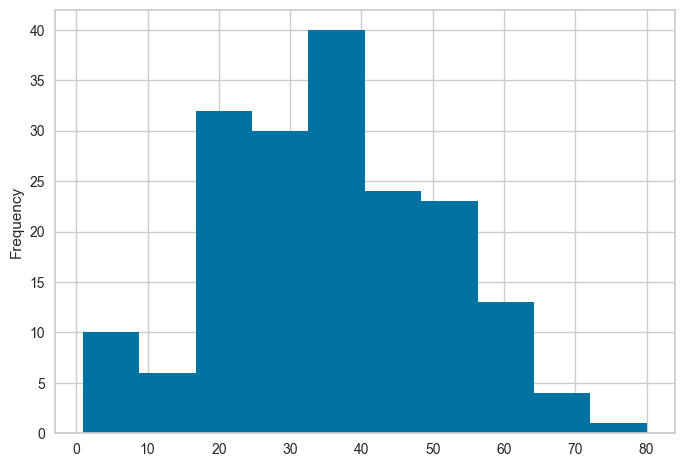

In [42]:
X["Age"].plot(kind="hist")

# Standard Scalar for Continious Variables

In [43]:
X = StandardScaler().fit_transform(X)

<Axes: ylabel='Frequency'>

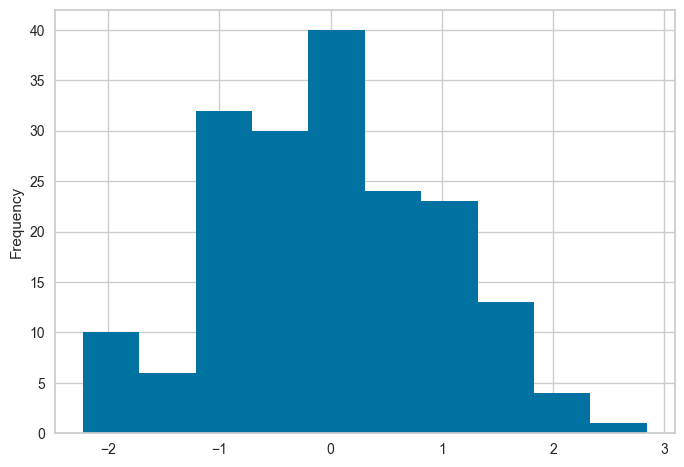

In [44]:
pd.DataFrame(X,columns=["Pclass","Fare","Age"])["Age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

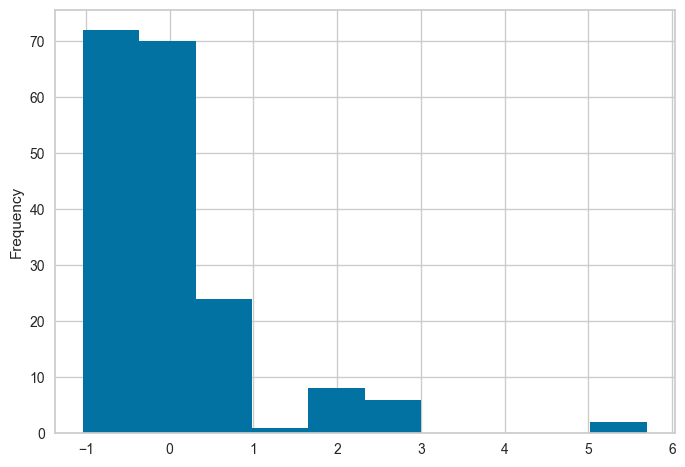

In [45]:
pd.DataFrame(X,columns=["Pclass","Fare","Age"])["Fare"].plot(kind="hist")

In [46]:
X = pd.DataFrame(X,columns=["Pclass","Fare","Age"])

In [47]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X)

In [34]:

X["labels"] = kmeans.labels_
X.head()

,Pclass,Fare,Age,labels
0,-0.372256,-0.097180,0.149065,1
1,-0.372256,-0.335997,-0.043230,1
2,-0.372256,-0.352250,1.174636,1
3,3.520480,-0.814070,-2.030273,2
4,-0.372256,-0.684702,1.431029,1


In [35]:
X.labels.value_counts()

labels
1    130
0     29
2     24
Name: count, dtype: int64

In [36]:
X.shape

(183, 4)

In [37]:
fig = px.scatter_3d(X, x='Pclass', y='Fare', z='Age',
              color='labels')
fig.show()

# Clustering Silhouette

In [38]:
from yellowbrick.cluster.silhouette import silhouette_visualizer

The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

/Users/satyapattnaik/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



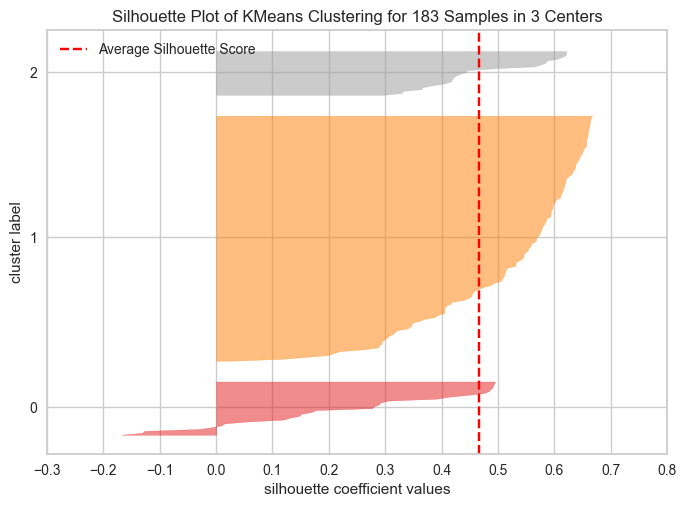

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 183 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=3, random_state=0))

In [39]:
silhouette_visualizer(kmeans,X[["Pclass","Fare","Age"]])

In [40]:
from yellowbrick.cluster.elbow import kelbow_visualizer

In [48]:
X.head()

,Pclass,Fare,Age
0,-0.372256,-0.097180,0.149065
1,-0.372256,-0.335997,-0.043230
2,-0.372256,-0.352250,1.174636
3,3.520480,-0.814070,-2.030273
4,-0.372256,-0.684702,1.431029


# Elbow method

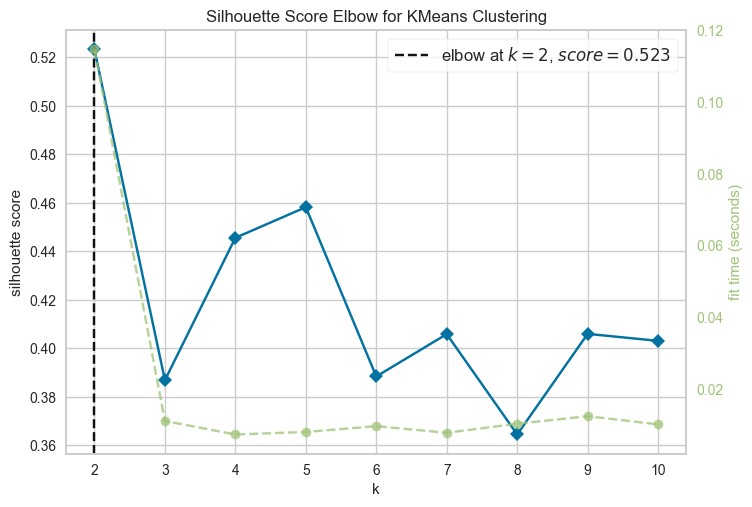

KElbowVisualizer(ax=<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=10), metric='silhouette')

In [52]:
kelbow_visualizer(KMeans(),X,metric="silhouette")

In [ ]:
100 data points -> 3 data points #K=3

In [ ]:
n_clusters = [2,3,4,5,6]
init = {"random","k-means++"}

In [53]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to t